In [151]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
#current_directory = os.getcwd()
#print(current_directory) 

In [152]:
df=pd.read_csv('E:\HitaJuneja\OneDrive - Cubic Logics\PES Semester 3\WatchNext--Sentiment-analysis-based-recommendation-system\dataset\datasets_1474_2639_IMDB-Movie-Data.csv')

In [153]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Score
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN


In [154]:
df['Metascore'].fillna(1,inplace=True)
df.head(30)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Score
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,NaN
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,NaN
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,NaN
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,NaN
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,NaN


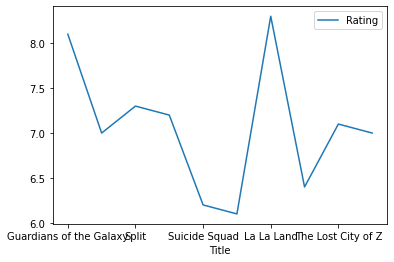

In [155]:
df.head(10).plot(x= "Title",y=["Rating"])
plt.show()                 

In [156]:
des=list(df['Description'])

stop_words = set(stopwords.words('english'))
#print(stop_words)

In [157]:
description=[]
punct=",.!:$%*a's\"\'\\'~``"
for x in des:
    x=x.lower()
    word_tokens = word_tokenize(x) 
    final = [w for w in word_tokens if not w in stop_words and not w in punct] 
    description.append(final)
    
    #print(description[1:10])

In [158]:
soup=[]
genre=list(df['Genre'])
for gen,sent in zip(genre,description):
    word_tokens = word_tokenize(gen)
    word=' '.join(sent)+' '+''.join(gen)
    soup.append(word)
    #print(soup[1:10])

In [159]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(soup)

In [160]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [161]:
df = df.reset_index(drop=True)
indices = pd.Series(df.index, index=df['Title'])

In [162]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df[['Title','Rating','Votes','Rank']].iloc[movie_indices]

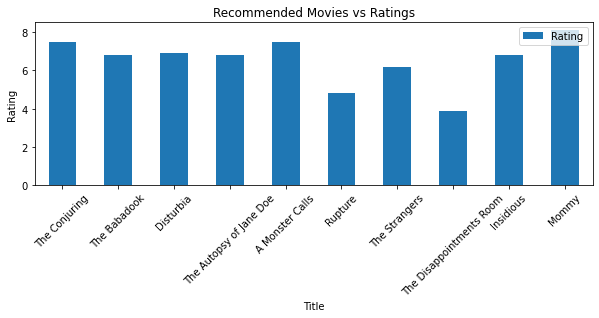

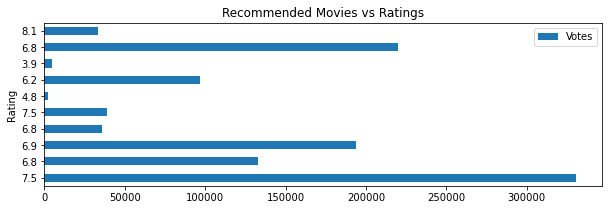

In [163]:
p = get_recommendations('The Conjuring 2', cosine_sim).plot(x="Title",y=["Rating"],xlabel="Title",ylabel="Rating",figsize=(10,3),kind='bar',title='Recommended Movies vs Ratings')
plt.xticks(rotation=45)
p = get_recommendations('The Conjuring 2', cosine_sim).plot(x="Rating",y=["Votes"],figsize=(10,3),grid=False,kind='barh',title='Recommended Movies vs Ratings')


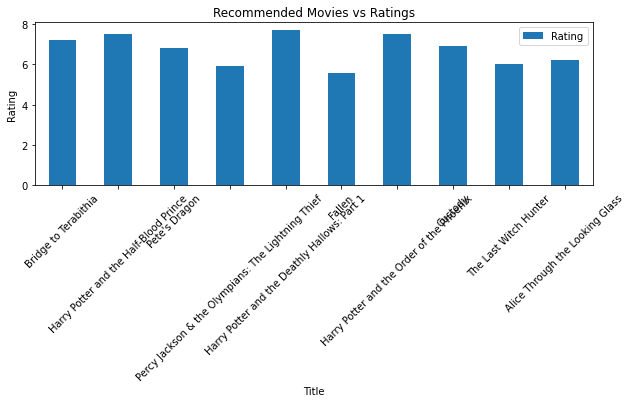

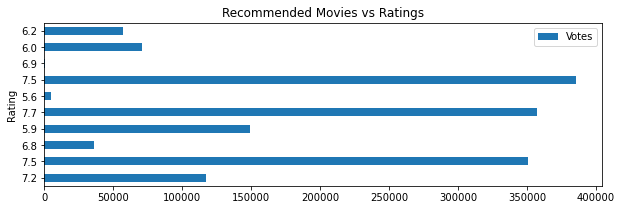

In [164]:
get_recommendations('Fantastic Beasts and Where to Find Them', cosine_sim)
p = get_recommendations('Fantastic Beasts and Where to Find Them', cosine_sim).plot(x="Title",y=["Rating"],xlabel="Title",ylabel="Rating",figsize=(10,3),kind='bar',title='Recommended Movies vs Ratings')
plt.xticks(rotation=45)
p = get_recommendations('Fantastic Beasts and Where to Find Them', cosine_sim).plot(x="Rating",y=["Votes"],figsize=(10,3),grid=False,kind='barh',title='Recommended Movies vs Ratings')
